# Formatting Baghela bulk data to csv with appropriate gene names

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc

In [ ]:
adata = sc.read_h5ad('../data/bulk_data/Baghela_2020/bulkDataFile.h5ad')
adata

AnnData object with n_obs × n_vars = 389 × 58050
    obs: 'sampleId', 'sampleName', 'Group', 'sort_id', 'outlier', 'location', 'cget_id', 'Group_sort_ID', 'Disease', 'Gender', 'Donor_ID', 'Age', 'Collection_location', 'Collection_site', 'sofa_24h_post_admisssion', 'in_hospital_mortality', 'geo_accesion', 'Sample.ID', 'disease_group'
    var: 'feature_id'
    uns: 'X_name', 'rnaSeqPipeline', 'rnaSeqProtocol', 'species'
    layers: 'X', 'normCounts', 'tpm', 'vstTransform'

In [3]:
adata.to_df()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283690,ENSG00000283691,ENSG00000283692,ENSG00000283693,ENSG00000283694,ENSG00000283695,ENSG00000283696,ENSG00000283697,ENSG00000283698,ENSG00000283699
9ea79989-68e0-49c9-b73f-e60030cc5f1a,2,0,26,84,11,1464,20,55,91,195,...,0,0,0,0,0,0,2,1,0,0
2b17123c-e6e0-48c2-82c8-ca4de3caf4a6,10,0,417,484,102,12558,80,335,317,910,...,0,0,0,0,0,0,34,0,0,0
13dd6294-d0f5-4b64-9f1c-55a6922487c2,7,0,109,131,19,2020,11,70,132,239,...,0,0,0,0,0,0,2,0,0,0
fb3c086d-c3e3-45e6-aa01-fae95ca8acc8,1,0,98,139,27,2138,6,103,146,305,...,0,0,0,0,0,0,3,0,0,0
a6feaf48-9f9f-4d8d-b165-189cee09c68f,0,0,116,280,65,6185,16,268,199,365,...,0,0,0,0,0,0,13,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16e8c9c5-cf67-4b59-b3ce-877f68f26a33,1,0,231,344,22,28053,18,144,103,652,...,0,0,0,0,0,0,25,0,0,0
5340de9d-31b5-4595-add4-b5baf25df05f,0,0,89,110,8,6571,17,98,21,105,...,0,0,0,0,0,0,3,0,0,0
9a0b509a-dfc7-42b1-aaa1-6aa939dcb452,3,0,837,640,124,12338,153,607,616,908,...,0,0,0,0,0,0,23,0,0,0
e91e124b-000c-4037-94b4-f901c4dd6389,0,0,181,264,30,7510,27,202,101,137,...,0,0,0,0,0,0,23,0,0,0


### Get gene symbols for ensgids and rename in anndata

In [4]:
# Example for mygene usage

import mygene
mg = mygene.MyGeneInfo()
ensgids_to_symbols = mg.getgenes(adata.var_names, fields=['name,symbol,entrezgene'])

In [5]:
def gene_dict(list_of_dicts, alt_symbol_key = 'query'):
    new_dict = {}
    missing_symbols = 0
    missing_symbol_list = []
    for i in range(len(list_of_dicts)):
        cur_dict = list_of_dicts[i]
        key = cur_dict['query']
        symbol_key = 'symbol'
        if 'symbol' not in cur_dict.keys():
            print(f"Missing symbol in dict {i}")
            missing_symbols += 1
            missing_symbol_list.append(key)
            symbol_key = alt_symbol_key
        value = cur_dict[symbol_key]
        new_dict[key] = value
    
    return new_dict, missing_symbol_list

In [6]:
new_dict, missing_symbols = gene_dict(ensgids_to_symbols)

Missing symbol in dict 20
Missing symbol in dict 1082
Missing symbol in dict 1599
Missing symbol in dict 1996
Missing symbol in dict 2189
Missing symbol in dict 2779
Missing symbol in dict 3323
Missing symbol in dict 3543
Missing symbol in dict 3951
Missing symbol in dict 4000
Missing symbol in dict 4638
Missing symbol in dict 4646
Missing symbol in dict 5162
Missing symbol in dict 5553
Missing symbol in dict 5692
Missing symbol in dict 6224
Missing symbol in dict 6275
Missing symbol in dict 6324
Missing symbol in dict 6413
Missing symbol in dict 6462
Missing symbol in dict 6668
Missing symbol in dict 6797
Missing symbol in dict 7539
Missing symbol in dict 7864
Missing symbol in dict 8189
Missing symbol in dict 8247
Missing symbol in dict 8618
Missing symbol in dict 8657
Missing symbol in dict 8857
Missing symbol in dict 9087
Missing symbol in dict 9251
Missing symbol in dict 9283
Missing symbol in dict 9308
Missing symbol in dict 9329
Missing symbol in dict 9780
Missing symbol in dict

In [7]:
missing_symbols

['ENSG00000002079',
 'ENSG00000069712',
 'ENSG00000083622',
 'ENSG00000093100',
 'ENSG00000100101',
 'ENSG00000103200',
 'ENSG00000106540',
 'ENSG00000108516',
 'ENSG00000111780',
 'ENSG00000112096',
 'ENSG00000116883',
 'ENSG00000116957',
 'ENSG00000121388',
 'ENSG00000124593',
 'ENSG00000125695',
 'ENSG00000130201',
 'ENSG00000130489',
 'ENSG00000130723',
 'ENSG00000131152',
 'ENSG00000131484',
 'ENSG00000132832',
 'ENSG00000133808',
 'ENSG00000137808',
 'ENSG00000139656',
 'ENSG00000141979',
 'ENSG00000142539',
 'ENSG00000144785',
 'ENSG00000145075',
 'ENSG00000146521',
 'ENSG00000148362',
 'ENSG00000149656',
 'ENSG00000150076',
 'ENSG00000150526',
 'ENSG00000150732',
 'ENSG00000154537',
 'ENSG00000159239',
 'ENSG00000161149',
 'ENSG00000163009',
 'ENSG00000165121',
 'ENSG00000166104',
 'ENSG00000166748',
 'ENSG00000167046',
 'ENSG00000167774',
 'ENSG00000167807',
 'ENSG00000167945',
 'ENSG00000168078',
 'ENSG00000169763',
 'ENSG00000169789',
 'ENSG00000169807',
 'ENSG00000170089',


In [8]:
adata.var_names = adata.var_names.to_series().replace(new_dict)

### Convert to TPM to pandas dataframe

In [9]:
layer_name = 'tpm'

# Convert the layer to a pandas DataFrame
df = pd.DataFrame(
    adata.layers[layer_name].toarray() if hasattr(adata.layers[layer_name], "toarray") else adata.layers[layer_name],
    index=adata.obs_names,
    columns=adata.var_names
)

In [10]:
df.drop(missing_symbols, axis=1, inplace=True)
df

,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,MIR548AH,MYOCOS,MIR522,MIR6715B,MIR3116-2,Y_RNA,MIR3202-2,HSFX3,VINAC1P,MIR4481
9ea79989-68e0-49c9-b73f-e60030cc5f1a,0.41,0.0,4.61,3.94,0.52,159.66,0.99,6.12,7.40,10.56,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.73,0.0,0.0
2b17123c-e6e0-48c2-82c8-ca4de3caf4a6,0.31,0.0,27.62,7.74,1.80,403.36,1.48,9.35,11.41,17.77,...,0.0,0.14,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
13dd6294-d0f5-4b64-9f1c-55a6922487c2,0.76,0.0,17.90,6.13,0.99,190.06,0.41,7.67,9.31,12.42,...,0.0,0.09,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
fb3c086d-c3e3-45e6-aa01-fae95ca8acc8,0.11,0.0,19.85,7.40,3.06,195.43,0.67,10.99,13.81,15.31,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
a6feaf48-9f9f-4d8d-b165-189cee09c68f,0.00,0.0,5.00,2.50,0.97,123.78,0.19,5.23,3.10,4.39,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16e8c9c5-cf67-4b59-b3ce-877f68f26a33,0.06,0.0,24.80,9.59,0.82,1509.95,1.59,7.37,3.37,20.09,...,0.0,0.12,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
5340de9d-31b5-4595-add4-b5baf25df05f,0.00,0.0,6.05,1.71,0.28,218.38,0.51,3.48,0.69,2.13,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
9a0b509a-dfc7-42b1-aaa1-6aa939dcb452,0.24,0.0,55.55,8.69,2.88,408.55,2.73,17.97,18.07,15.72,...,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
e91e124b-000c-4037-94b4-f901c4dd6389,0.00,0.0,10.22,2.73,0.53,190.53,0.64,6.09,2.35,1.89,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


#### Remove zero-expressed genes

In [17]:
df_subset = df.loc[:,np.mean(df, axis = 0) > 0.3]
df_subset

,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,NIPAL3,...,TRBV6-3,H2BC6-AS1,LOC105372480,RN7SK,MPHOSPH10P3,CNTNAP3C,PET100P1,GPR141BP,LOC100996792,LINC02009
9ea79989-68e0-49c9-b73f-e60030cc5f1a,4.61,3.94,0.52,159.66,0.99,6.12,7.40,10.56,0.43,6.40,...,4.00,0.70,0.22,8.24,0.00,1.27,0.00,0.00,0.41,0.09
2b17123c-e6e0-48c2-82c8-ca4de3caf4a6,27.62,7.74,1.80,403.36,1.48,9.35,11.41,17.77,1.60,13.47,...,11.76,0.93,0.28,8.95,0.43,2.68,2.15,0.11,0.00,0.20
13dd6294-d0f5-4b64-9f1c-55a6922487c2,17.90,6.13,0.99,190.06,0.41,7.67,9.31,12.42,0.60,8.90,...,12.95,0.13,0.31,6.79,0.00,1.06,0.00,0.27,0.45,0.00
fb3c086d-c3e3-45e6-aa01-fae95ca8acc8,19.85,7.40,3.06,195.43,0.67,10.99,13.81,15.31,0.79,13.14,...,12.21,0.30,0.38,3.36,0.00,0.05,0.00,0.00,0.20,0.00
a6feaf48-9f9f-4d8d-b165-189cee09c68f,5.00,2.50,0.97,123.78,0.19,5.23,3.10,4.39,0.51,5.69,...,2.56,0.35,0.08,11.36,0.09,0.41,0.00,0.07,0.04,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16e8c9c5-cf67-4b59-b3ce-877f68f26a33,24.80,9.59,0.82,1509.95,1.59,7.37,3.37,20.09,0.54,4.63,...,0.00,2.34,0.47,60.85,2.14,3.97,0.00,0.55,0.28,0.08
5340de9d-31b5-4595-add4-b5baf25df05f,6.05,1.71,0.28,218.38,0.51,3.48,0.69,2.13,0.07,0.58,...,0.26,0.68,0.20,21.01,0.00,0.25,1.30,0.39,0.66,0.02
9a0b509a-dfc7-42b1-aaa1-6aa939dcb452,55.55,8.69,2.88,408.55,2.73,17.97,18.07,15.72,0.65,6.40,...,2.44,8.11,0.53,51.13,1.05,0.38,0.00,2.50,0.11,9.48
e91e124b-000c-4037-94b4-f901c4dd6389,10.22,2.73,0.53,190.53,0.64,6.09,2.35,1.89,0.62,3.46,...,3.21,2.62,0.39,27.06,0.00,0.31,3.01,0.68,0.45,0.30


#### Metadata

In [19]:
metadata = adata.obs[['Group', 'Disease', 'Gender', 'Donor_ID', 'geo_accesion', 'disease_group']]
sample_names = metadata.loc[df_subset.index.tolist(), 'geo_accesion']
metadata.index = metadata['geo_accesion'].tolist()
metadata

,Group,Disease,Gender,Donor_ID,geo_accesion,disease_group
GSM5609238,Whole_Blood_Healthy_Control,Healthy,female,hcwes063,GSM5609238,Healthy Control
GSM5609334,Whole_Blood_Healthy_Control,Healthy,female,hchlD187,GSM5609334,Healthy Control
GSM5609219,Whole_Blood_Healthy_Control,Healthy,female,hchlD149,GSM5609219,Healthy Control
GSM5609245,Whole_Blood_Healthy_Control,Healthy,male,hcwes078,GSM5609245,Healthy Control
GSM5609213,Whole_Blood_Healthy_Control,Healthy,male,hccol002,GSM5609213,Healthy Control
...,...,...,...,...,...,...
GSM5609298,Whole_Blood_Sepsis_Died,Sepsis,male,sepcv053T1,GSM5609298,Sepsis Died
GSM5609114,Whole_Blood_Sepsis_Died,Sepsis,male,sepnet9017,GSM5609114,Sepsis Died
GSM5609322,Whole_Blood_Sepsis_Died,Sepsis,female,sepcv078T1,GSM5609322,Sepsis Died
GSM5609076,Whole_Blood_Sepsis_Died,Sepsis,male,sepnet1375,GSM5609076,Sepsis Died


In [20]:
df_subset.index = sample_names
df_subset

,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,NIPAL3,...,TRBV6-3,H2BC6-AS1,LOC105372480,RN7SK,MPHOSPH10P3,CNTNAP3C,PET100P1,GPR141BP,LOC100996792,LINC02009
geo_accesion,,,,,,,,,,,,,,,,,,,,,
GSM5609238,4.61,3.94,0.52,159.66,0.99,6.12,7.40,10.56,0.43,6.40,...,4.00,0.70,0.22,8.24,0.00,1.27,0.00,0.00,0.41,0.09
GSM5609334,27.62,7.74,1.80,403.36,1.48,9.35,11.41,17.77,1.60,13.47,...,11.76,0.93,0.28,8.95,0.43,2.68,2.15,0.11,0.00,0.20
GSM5609219,17.90,6.13,0.99,190.06,0.41,7.67,9.31,12.42,0.60,8.90,...,12.95,0.13,0.31,6.79,0.00,1.06,0.00,0.27,0.45,0.00
GSM5609245,19.85,7.40,3.06,195.43,0.67,10.99,13.81,15.31,0.79,13.14,...,12.21,0.30,0.38,3.36,0.00,0.05,0.00,0.00,0.20,0.00
GSM5609213,5.00,2.50,0.97,123.78,0.19,5.23,3.10,4.39,0.51,5.69,...,2.56,0.35,0.08,11.36,0.09,0.41,0.00,0.07,0.04,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5609298,24.80,9.59,0.82,1509.95,1.59,7.37,3.37,20.09,0.54,4.63,...,0.00,2.34,0.47,60.85,2.14,3.97,0.00,0.55,0.28,0.08
GSM5609114,6.05,1.71,0.28,218.38,0.51,3.48,0.69,2.13,0.07,0.58,...,0.26,0.68,0.20,21.01,0.00,0.25,1.30,0.39,0.66,0.02
GSM5609322,55.55,8.69,2.88,408.55,2.73,17.97,18.07,15.72,0.65,6.40,...,2.44,8.11,0.53,51.13,1.05,0.38,0.00,2.50,0.11,9.48


In [21]:
np.sum(df_subset, axis=1)

geo_accesion
GSM5609238    994065.92
GSM5609334    990150.45
GSM5609219    993293.32
GSM5609245    990906.57
GSM5609213    996702.85
                ...    
GSM5609298    986787.90
GSM5609114    995315.52
GSM5609322    989451.10
GSM5609076    993520.94
GSM5609016    993078.51
Length: 389, dtype: float64

#### Write data to output

In [ ]:
metadata.to_csv('../data/bulk_data/Baghela_2020/Metadata_Baghela.csv')
df_subset.to_csv('../data/bulk_data/Baghela_2020/TPM_data_Baghela.csv')

### Check data in t-SNE and PCA

Text(0, 0.5, 'PC2 - explained variance 0.04501631373125997')

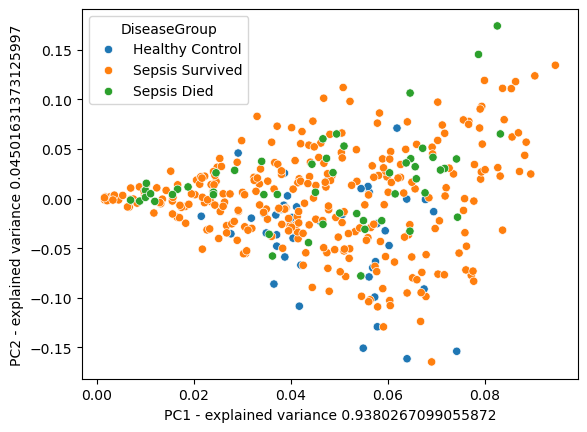

In [23]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(df_subset.transpose())
PCA(n_components=2)

df_plot = pd.DataFrame(pca.components_.transpose())
df_plot.columns = ['PC1', 'PC2']
df_plot['SampleID'] = df_subset.index.to_list()
df_plot['DiseaseGroup'] = metadata.loc[df_subset.index.to_list(), 'disease_group'].to_list()

sns.scatterplot(data = df_plot, x = 'PC1', y = 'PC2', hue = 'DiseaseGroup')
plt.xlabel(f"PC1 - explained variance {pca.explained_variance_ratio_[0]}")
plt.ylabel(f"PC2 - explained variance {pca.explained_variance_ratio_[1]}")